In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --값--
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

In [3]:
# --입력, 정답 벡터 생성(one-hot encoding)--
input_data = []
correct_data = []
for x in X:
    for y in Y:
        input_data.append([x, y]) # x,y를 list형태로 input
        if y < np.sin(np.pi*x):  # 즉, y값이 sin곡선 아래에 있으면
            correct_data.append([0, 1])
        else:  # 만약 위에 있다면
            correct_data.append([1, 0])
        # 정답을 만들어 두는 것    
        
n_data = len(correct_data)
# numpy array로 변환
input_data = np.array(input_data)
correct_data = np.array(correct_data)

In [4]:
# 초기값 설정
n_in = 2  # 입력층 뉴런 수
n_mid = 6  # 이쪽의 뉴런 수는 6 (은닉층 뉴런 수)
n_out = 2  # 출력의 뉴런 수는 2(출력층 뉴런 수)

wb_width = 0.01  # 가중치와 편향 설정을 위한 정규분포 표준편차
eta = 0.1  # 학습률
epoch = 101
interval = 10  # 인터벌은 10개씩  (경과 표시 간격)

In [5]:
# 미들레이어 이전거에서 수정하는게 편할듯

# --은닉층--
class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)  # 가중치(행렬)
        self.b = wb_width * np.random.randn(n)          # 편향 (벡터)
        
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1 / (1 + np.exp(-u))   # 시그모이드 함수
        
        
    def backward(self, grad_y):
        delta = grad_y * (1 - self.y) * self.y
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
# 재사용 가능. 수정할 부분 없음

In [6]:
# 출력 부분도 재사용

# --출력층--
class OutputLayer:
    def __init__ (self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n) # 가중치(행렬)
        self.b = wb_width * np.random.randn(n) # 편향(벡터)
        
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        #self.y = u  # 항등 함수가 아니고 소프트 맥스니까
        self.y = np.exp(u) / np.sum(np.exp(u), axis=1, keepdims=True)  # 이 부분 수정 -> 소프트맥스 식이니까 구애받지 ㅁ말걸
        
        
    def backward(self, t):
        delta = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
    
    
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
# 나머진 똑같음

In [7]:
# 그럼 이것도 똑같겠고

# --각 층의 초기화--
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

In [8]:
# 여기부터 달라짐

# 데이터를 미리 생성해 놓음

# --학습--
sin_data = np.sin(np.pi*X)  # 결과 검증용

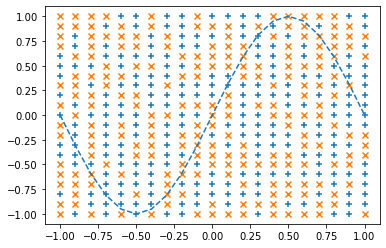

Epoch: 0/101 Error: 0.7251373569936339


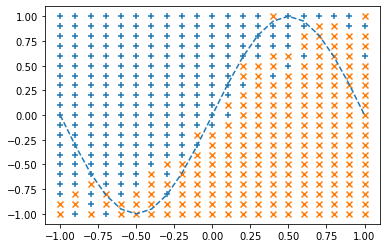

Epoch: 10/101 Error: 0.3041919026339138


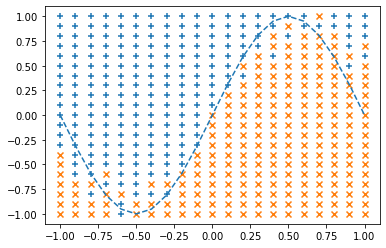

Epoch: 20/101 Error: 0.22037885005635177


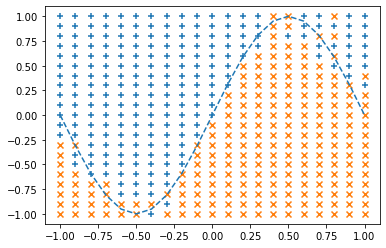

Epoch: 30/101 Error: 0.16683892247141965


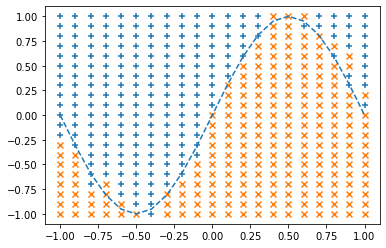

Epoch: 40/101 Error: 0.12903975965014078


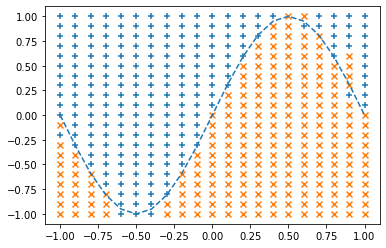

Epoch: 50/101 Error: 0.10389537153420335


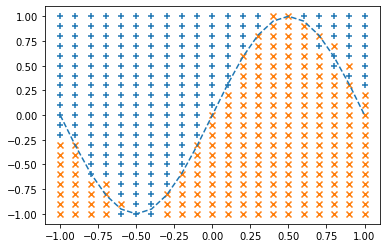

Epoch: 60/101 Error: 0.09398201272547452


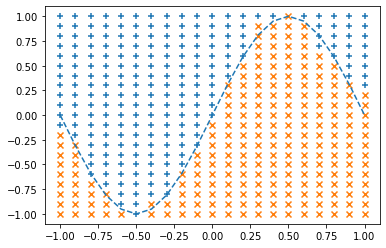

Epoch: 70/101 Error: 0.07523835021410376


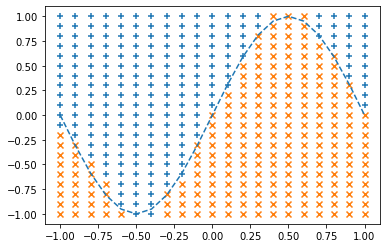

Epoch: 80/101 Error: 0.07770133032768069


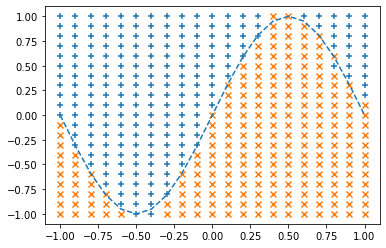

Epoch: 90/101 Error: 0.06340207420616945


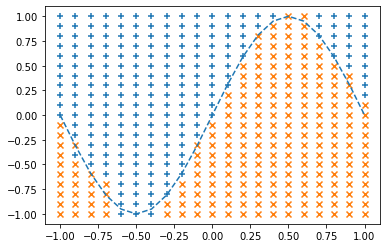

Epoch: 100/101 Error: 0.06917727791232585


In [9]:
# --학습--
for i in range(epoch):
    
    # 인덱스 임의 섞기
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    # 결과 표시용
    total_error = 0
    
    # sin 곡선보다 위에있는놈, 아래 있는놈 구분하기 위해 2개씩 만듬
    x_1 = []
    x_2 = []
    y_1 = []
    y_2 = []

    
    for idx in index_random:
        x = input_data[idx]
        t = correct_data[idx]
       
        # 순전파
        middle_layer.forward(x.reshape(1,2))
        output_layer.forward(middle_layer.y)

       
        # 역전파
        output_layer.backward(t.reshape(1, 2))
        middle_layer.backward(output_layer.grad_x)
        
       
        # 가중치와 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)

       
        if i % interval == 0:
            y = output_layer.y.reshape(-1)  # 행렬을 벡터로 되돌림
           
            # 오차 계산
            total_error += -np.sum(t * np.log(y + 1e-7))  # t=타겟  # 교차 엔트로피 오차
           
            # 확률 크기를 비교하여 분류
            # y 값이 2개 나오는데, y 첫번째 값이 2번째 값보다 크면
            if y[0] > y[1]:
                x_1.append(x[0])  # 입력의 첫번째 값 넣기
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])

    if i % interval == 0:
            
        # 출력 그래프 표시
        plt.plot(X, sin_data, linestyle='dashed')
        plt.scatter(x_1, y_1, marker="+")
        plt.scatter(x_2, y_2, marker="x")  # sin 곡선 아래 있는 놈
        plt.show()
        
        # 에포크 수와 오차 표시
        print("Epoch: " + str(i) + '/' + str(epoch),
            "Error: " +str(total_error/n_data))